# Module 4 Autograded Assignment

In [1]:
# Load Necesary Libraries
library(testthat)
library(ggplot2)

# Problem 1

<img src="ralphie-run.jpg" style="width:600px;"/>

Ralphie is fascinated with sports and sports fans, and wants to how many people go to the football games to see her run across the field. However, she can't ask the game organizers to share their numbers with her (because she's a buffalo) so she decides to count how many people are in the stadium herself. But counting while running is difficult, so her counts may be incorrect. To address this problem, Ralphie has hired $399$ other buffalo to hide amongst the stadium and count the number of attendees. Each buffalo counted at a total of $n=10$ games, and their results can be seen below. Note that this problem assumes that all of the games have the same underlying population.

We want to help Ralphie determine the average number of attendees. To do that, we can use confidence intervals. Let's begin by loading in each Buffalo's counts.

In [2]:
data.buffalo = read.csv("buffalo.csv", sep=",")
data.buffalo = data.buffalo[,-1]
head(data.buffalo)

,game1,game2,game3,game4,game5,game6,game7,game8,game9,game10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,32577,23042,32978,32634,27487,15760,19428,23231,24965,39427
2,29581,20205,18114,23263,23204,22530,26513,19648,27614,17574
3,23654,27264,25800,29825,24657,28021,31514,20854,17292,25280
4,23585,21742,22400,21103,29360,31911,30952,22422,32429,23323
5,35547,28364,22283,20007,18000,18606,15617,31939,29992,23636
6,26596,22739,39648,20227,24670,26500,28709,23964,11656,17418


**Part A)** Part A has been temporarily removed from this assignment while the team works out some autograder issues. We apologize for the inconvenience!

**Part B)** Theoretical Interlude

When Ralph (Ralphie's cousin) ran his code from **Part A**, he got the confidence interval $[19,571, 25,249]$ for the mean number of attendees. But he's not sure how to interpret his confidence interval so he's asked you for help. For each of the following statements, answer `TRUE` or `FALSE` into the corresponding answer variable for whether the statement is correct.

**1.** If Ralph has no other evidence regarding the true mean number of attendees, he could say there is a $90\%$ chance that the population's true mean falls between $19,571$ and $25,249$.

**2.** If Ralph counts the number of attendees at another game, there is a $90\%$ chance that the counted number will be between $19,571$ and $25,249$. 

**3.** If Ralph also calculates a $95\%$ confidence interval for his data, then the $95\%$ interval will be wider than the $90\%$ interval.

**4.** If Ralph counts the number of attendees at an $11^{th}$ game, adds that count to his original data and then calculates another $90\%$ confidence interval, then the new interval will be narrower than the original one (i.e. the difference between the upper and lower values will be smaller).

In [137]:
# Answer each question with a boolean, either TRUE or FALSE
prob.2.b.1 = FALSE

prob.2.b.2 = FALSE

prob.2.b.3 = TRUE

prob.2.b.4 = TRUE #FALSE

# your code here
#print(dim(data.buffalo))
ms = rowMeans(data.buffalo)
sds = apply(data.buffalo, 1, sd)
n <- 10 
t95 <- qt(0.975, n-1)
#cbind.data.frame(lb = as.integer(ms - t95*sds/sqrt(n)), ub = as.integer(ms + t95*sds/sqrt(n)))
obs <- as.integer(data.buffalo[1,])
for (i in 2:ncol(data.buffalo)) {
    t95 <- qt(0.975, i-1)
    m <- mean(obs[1:i])
    s <- sd(obs[1:i])
    lb <- as.integer(m - t95*s/sqrt(n))
    ub <- as.integer(m + t95*s/sqrt(n))
    print(c(i, as.integer(m), as.integer(s), lb, ub, ub-lb))
}

[1]     2 27809  6742   718 54900 54182
[1]     3 29532  5624 21879 37184 15305
[1]     4 30307  4847 25429 35185  9756
[1]     5 29743  4383 25895 33591  7696
[1]     6 27413  6925 21783 33042 11259
[1]     7 26272  7005 20851 31692 10841
[1]     8 25892  6574 20976 30808  9832
[1]     9 25789  6157 21299 30279  8980
[1]    10 27152  7231 21979 32326 10347


In [89]:
# Hidden Test Cell

In [90]:
# Hidden Test Cell

In [91]:
# Hidden Test Cell

In [92]:
# Hidden Test Cell

**Part C)**

Now let's look at the data from all the Buffalo. If we calculate the $60\%$ confidence interval for every buffalo's count (i.e. data sample), how many CIs do we expect to contain the true mean? Store your answer in `theoretical_hits`.

Then we need to check our theoretical answer with our actual data. Calculate the $60\%$ confidence interval for each buffalo's count. Then commpute how many of those CIs contain the true mean. Assume that the true mean is $25,000$. Store this value in `sample_hits`. Does this value match the theoretical value?

It may be helpful to visualize the Confidence Intervals, along with the true mean. Create a plot for the Confidence Intervals for the first $40$ rows of the dataframe. Also plot  `true_mean=25000` as a horizontal dotted line. **This plot will not be graded**, but may help you get a better understanding of different confidence intervals for the same underlying population. We recommend looking into the `ggplot` package to help with this task.

In [135]:
theoretical_hits =  as.integer(nrow(data.buffalo)*0.6)
sample_hits = 249

CI_level = 0.6
true_mean = 25000

# your code here
ms = rowMeans(data.buffalo)
sds = apply(data.buffalo, 1, sd)
n <- 10
#t80 <- qt(1-(1-CI_level)/2, n-1)
t80 <- qt(0.8, n-1)
df <- cbind.data.frame(m = ms, lb = as.integer(ms - t80*sds/sqrt(n)), ub = as.integer(ms + t80*sds/sqrt(n)))
df$hits <- (true_mean >= df$lb) & (true_mean <= df$ub)
sum(df$hits)
#dim(df)
#head(df)

[1] 249

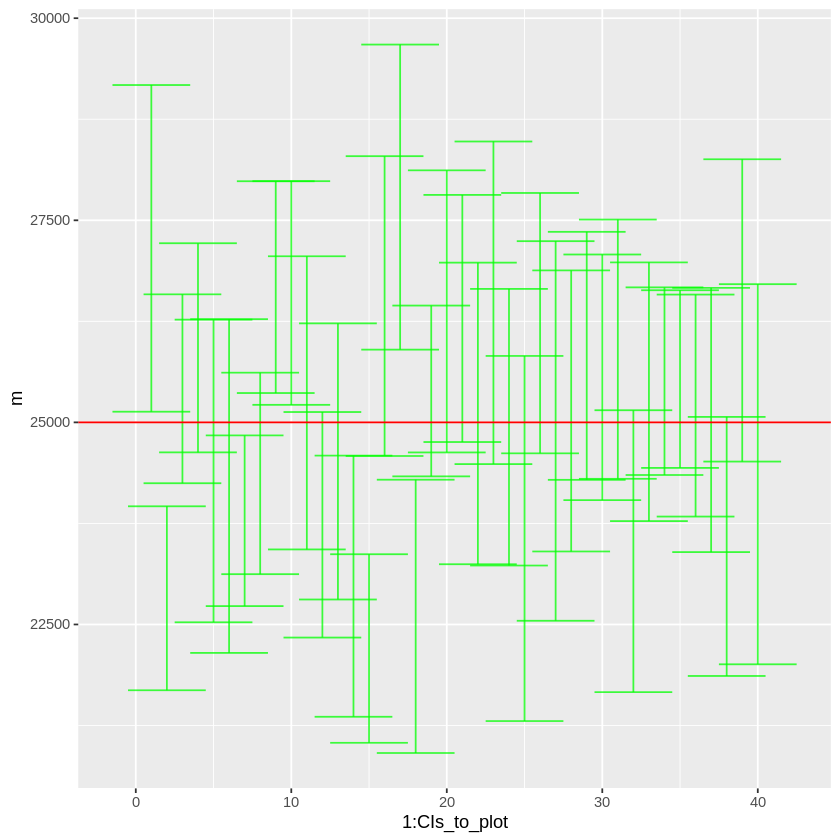

In [104]:
CIs_to_plot = 40
g = ggplot()

# your code here
ggplot(data=df[1:CIs_to_plot,], aes(x=1:CIs_to_plot, y=m)) + #geom_linerange(aes(ymax=ub,ymin=lb)) + 
    geom_errorbar(aes(ymax=ub,ymin=lb),color='green', alpha=0.75, width=5) +
    geom_hline(yintercept=true_mean, color='red')

In [106]:
# Hidden Test Cell

# Problem 2

Suppose you run two different email Ad campaigns over many days and record the amount of traffic driven to your website on days that each Ad is sent. In particular, suppose that Ad 1 is sent on 60 different days and generates an average of 2.2 million page views per day with an sd of 1 million views, and Ad 2 is sent on 40 different days and generates an average of 2.5 million page views per day with an sd of 0.75 million views.

**Part A)** 

Find a 95% confidence interval for the difference in average page views per day (in units of millions of views). Save the upper bound as `conf.int.upper` and the lower bound as `conf.int.lower`. Round your answers to have three decimal places.

In [129]:
conf.int.upper = 0.044
conf.int.lower = -0.644

# your code here
n1 <- 60
x1bar <- 2.2 #*1e6
s1 <- 1 #1e6
n2 <- 40
x2bar <- 2.5 #*1e6
s2 <- 0.75 #*1e6
#df <- (s1^2/n1+s2^2/n2)^2 / ((s1^2/n1)^2/(n1-1) + (s2^2/n2)^2/(n2-1))
#t975 <- qt(0.975, df)
z975 <- qnorm(0.975)
sf <- sqrt(s1^2/n1+s2^2/n2)
xbar <- x1bar-x2bar
round(c((xbar-z975*sf), (xbar+z975*sf)), 3)
#c((xbar-z975*sf)/1e6, (xbar+z975*sf)/1e6)
#c(xbar-t975*sf, xbar+t975*sf)

[1] -0.644  0.044

In [130]:
# Hidden Test Cell

**Part B)**

Based on your results to **Part A**, is there a statistically significant difference between Ad 1 and Ad 2? Save the boolean value `TRUE` (if there is a difference) or `FALSE` (if there is not a difference) into variable `prob.2.b`.

In [131]:
prob.2.b = FALSE

# your code here
(conf.int.upper >= 0) & (conf.int.lower <= 0)

[1] TRUE

In [132]:
# Hidden Test Cell